In [1]:
print("Hello from Jupyter Notebook in VS Code!")


Hello from Jupyter Notebook in VS Code!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Property_Type    1000 non-null   object
 1   Total_Area_sqft  1000 non-null   int64 
 2   Num_Rooms        1000 non-null   int64 
 3   Num_Dining_Area  1000 non-null   int64 
 4   Num_Washrooms    1000 non-null   int64 
 5   Num_Balconies    1000 non-null   int64 
 6   Floor_Level      1000 non-null   int64 
 7   Year_Built       1000 non-null   int64 
 8   Price_per_sqft   1000 non-null   int64 
 9   Estimated_Price  1000 non-null   int64 
 10  Category         1000 non-null   object
dtypes: int64(9), object(2)
memory usage: 86.1+ KB
None
       Total_Area_sqft    Num_Rooms  Num_Dining_Area  Num_Washrooms  \
count      1000.000000  1000.000000      1000.000000    1000.000000   
mean       2771.639000     4.029000         0.991000       2.474000   
std        1300.137568     1.987488     

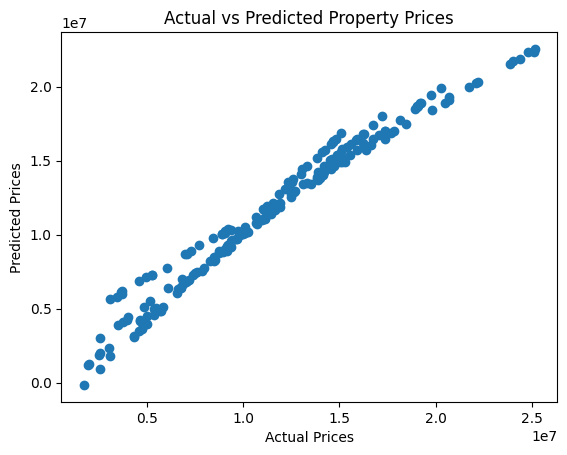

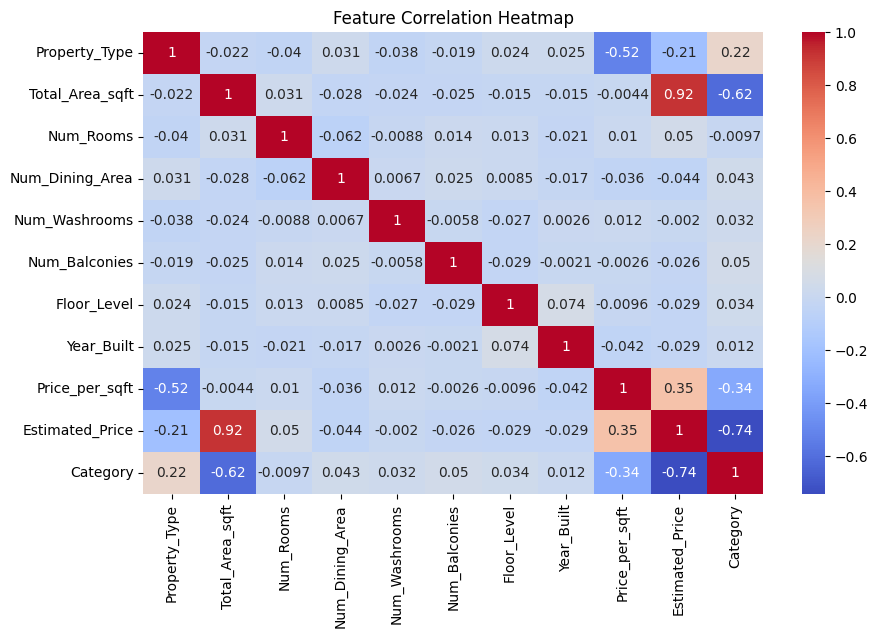

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error, r2_score
data= pd.read_csv("C:/Users/Lenovo/Downloads/Property_Dataset.csv")
data.head()

# 3️⃣ Data Exploration
print(data.info())
print(data.describe())
print(data['Property_Type'].value_counts())
encoder = LabelEncoder()
data['Property_Type'] = encoder.fit_transform(data['Property_Type'])
data['Category'] = encoder.fit_transform(data['Category'])

# 5️⃣ Feature-Target Split
X_class = data.drop(['Category', 'Estimated_Price'], axis=1)
y_class = data['Category']
X_reg = data.drop(['Estimated_Price', 'Category'], axis=1)
y_reg = data['Estimated_Price']

# 6️⃣ Train-Test Split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# 7️⃣ Feature Scaling
scaler = StandardScaler()
Xc_train_scaled = scaler.fit_transform(Xc_train)
Xc_test_scaled = scaler.transform(Xc_test)
Xr_train_scaled = scaler.fit_transform(Xr_train)
Xr_test_scaled = scaler.transform(Xr_test)

# 8️⃣ Classification Models

## KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xc_train_scaled, yc_train)
yc_pred_knn = knn.predict(Xc_test_scaled)
print("KNN Accuracy:", accuracy_score(yc_test, yc_pred_knn))
print(confusion_matrix(yc_test, yc_pred_knn))

## Logistic Regression
logreg = LogisticRegression()
logreg.fit(Xc_train_scaled, yc_train)
yc_pred_log = logreg.predict(Xc_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(yc_test, yc_pred_log))

## Naive Bayes
nb = GaussianNB()
nb.fit(Xc_train, yc_train)  # Naive Bayes doesn't need scaling
yc_pred_nb = nb.predict(Xc_test)
print("Naive Bayes Accuracy:", accuracy_score(yc_test, yc_pred_nb))

# 9️⃣ Regression Model

## Linear Regression
linreg = LinearRegression()
linreg.fit(Xr_train_scaled, yr_train)
yr_pred_lin = linreg.predict(Xr_test_scaled)
print("Linear Regression MAE:", mean_absolute_error(yr_test, yr_pred_lin))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(yr_test, yr_pred_lin)))
print("Linear Regression R2 Score:", r2_score(yr_test, yr_pred_lin))

# 🔟 Visualizing Predictions
plt.scatter(yr_test, yr_pred_lin)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Property Prices")
plt.show()

# 📊 Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
